In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

#Dataset

Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
#10 col names are features, and since we're predicting the class (label) => supervised
df = pd.read_csv("magic04.data", names=cols)
df.head() #returns the first 5 elements

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df["class"] = (df["class"] == "g").astype(int) #Computer is better at analyzing numbers, so we're converting g, h into numbers. if g => 1 if h => 0.

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

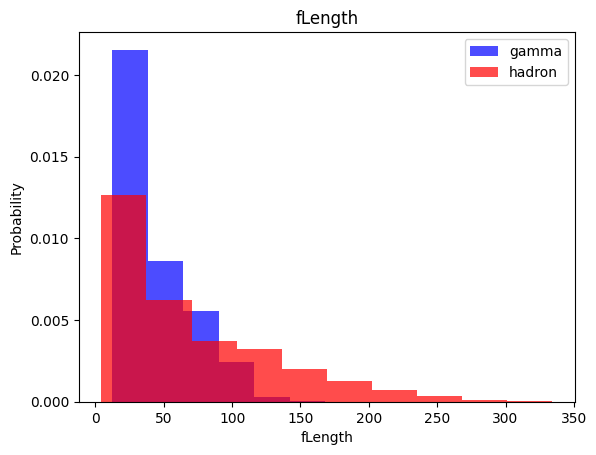

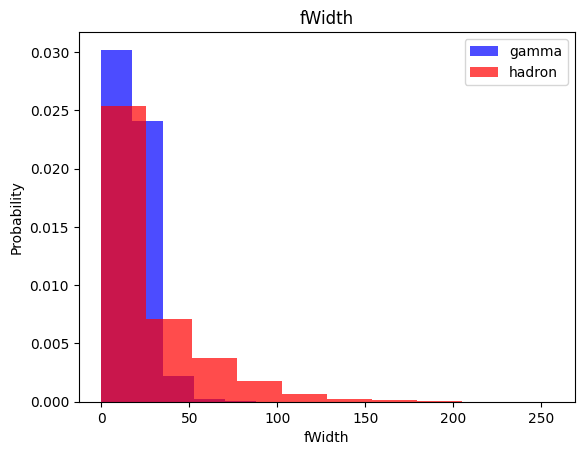

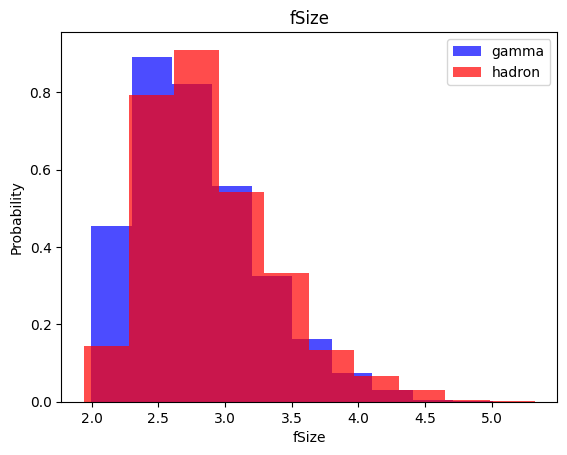

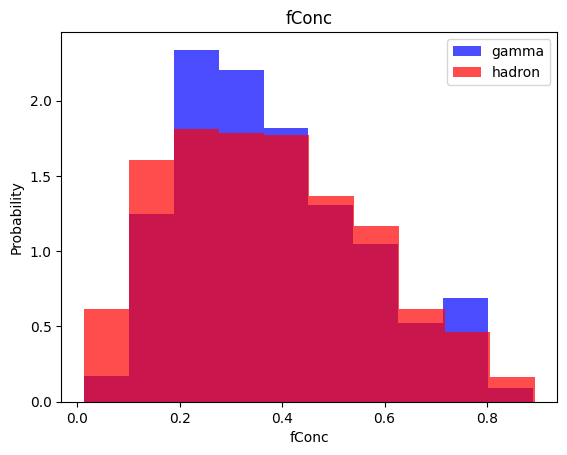

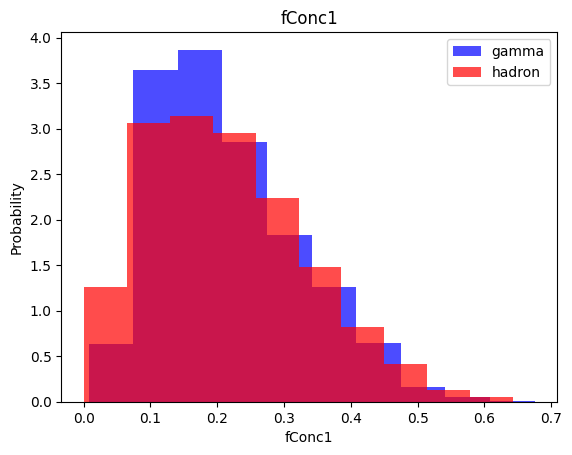

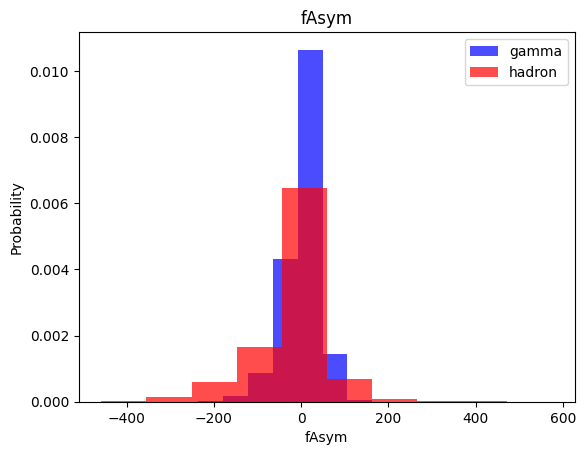

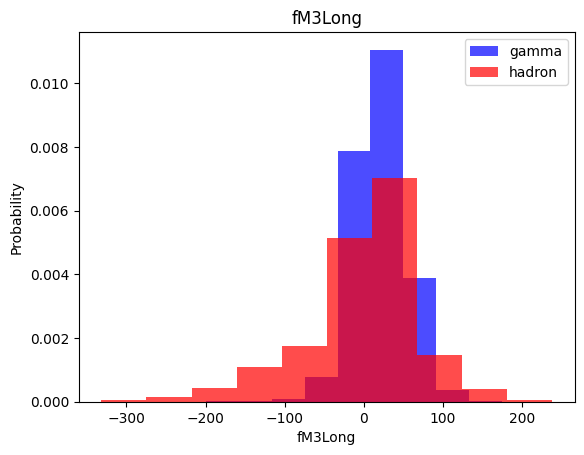

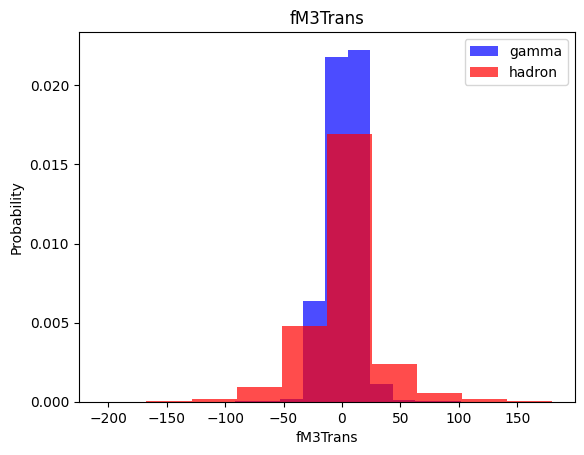

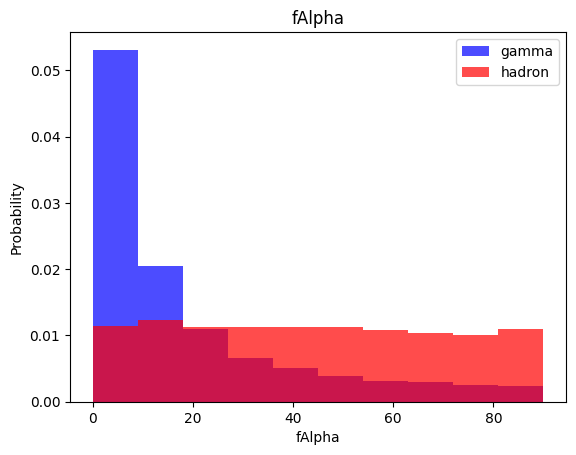

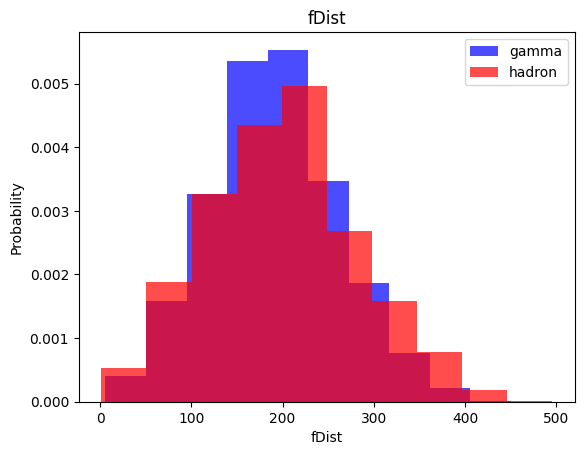

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]== 1][label], color = 'blue', label = 'gamma', alpha = 0.7, density = True) #alpha is the transparent to opaqueness of the shown histogram, density == True normalises the data.
  plt.hist(df[df["class"]== 0][label], color = 'red', label = 'hadron', alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


#Train, Validation, Test datasets

In [ ]:
train, valid, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))]) #60% train, 60%-80% will go to validate, rest to test.

In [ ]:
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  Y = dataframe[dataframe.columns[-1]].values
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, Y = ros.fit_resample(X, Y)

  data = np.hstack((X, np.reshape(Y, (len(Y), 1)))) #hstack is horizontally stacking 2d array, X is 2d and Y is 1d thats why reshape
  return data, X, Y

In [ ]:
print(len(train[train["class"] == 1])) #gamma
print(len(train[train["class"] == 0])) #hadron # the discrepancy of the numbers of hadron and gamma is high, so we imported a random oversampler

7432
3980


In [ ]:
train, X_train, Y_train = scale_dataset(train, oversample = True)
valid, X_valid, Y_valid = scale_dataset(valid, oversample = False)
test, X_test, Y_test = scale_dataset(test, oversample = False) #valid and test are oversample= false, because I want to check how my model works on unlabeled data.

In [ ]:
len(Y_train)

14864

In [ ]:
sum(Y_train == 1)

7432

In [ ]:
sum(Y_train == 0)

7432

#kNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5) #n_neighbors sets how many nearest neighbors we're looking at.
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
Y_pred = knn_model.predict(X_test)

In [ ]:
Y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
Y_test

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
print(classification_report(Y_test, Y_pred)) #f1-score is the average of precision and recall

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1321
           1       0.86      0.85      0.86      2483

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



kNN = 82% accuracy

#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, Y_train)

In [ ]:
Y_pred = nb_model.predict(X_test)
print(classification_report(Y_test, Y_pred)) #f1-score is the average of precision and recall

              precision    recall  f1-score   support

           0       0.68      0.40      0.51      1321
           1       0.74      0.90      0.81      2483

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



not that great, clearly. Accuracy still 72% but not very accurate for us.

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression() #if we hover over LogisticRegression we find penalty to be l2, which means loss2 is quadratic
lg_model = nb_model.fit(X_train, Y_train)

In [ ]:
Y_pred = lg_model.predict(X_test)
print(classification_report(Y_test, Y_pred)) #f1-score is the average of precision and recall

              precision    recall  f1-score   support

           0       0.68      0.40      0.51      1321
           1       0.74      0.90      0.81      2483

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



74% accuracy for LogisticRegression

#SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, Y_train)

In [ ]:
Y_pred = svm_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1321
           1       0.90      0.90      0.90      2483

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



85% accuracy for SVM

#Neural Networks

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

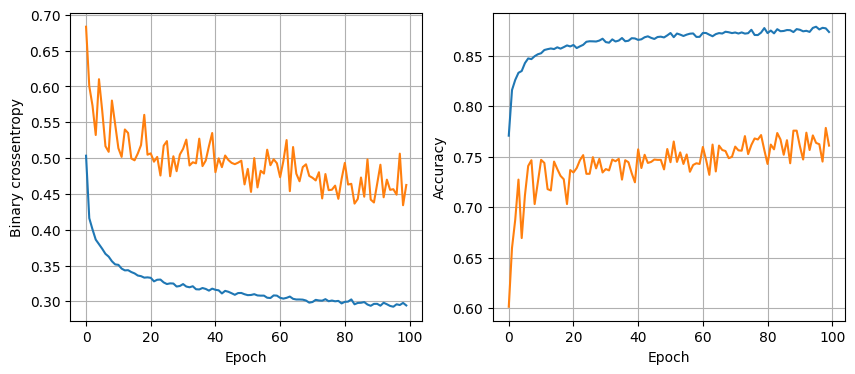

In [ ]:
plot_history(history)

In [ ]:
def train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


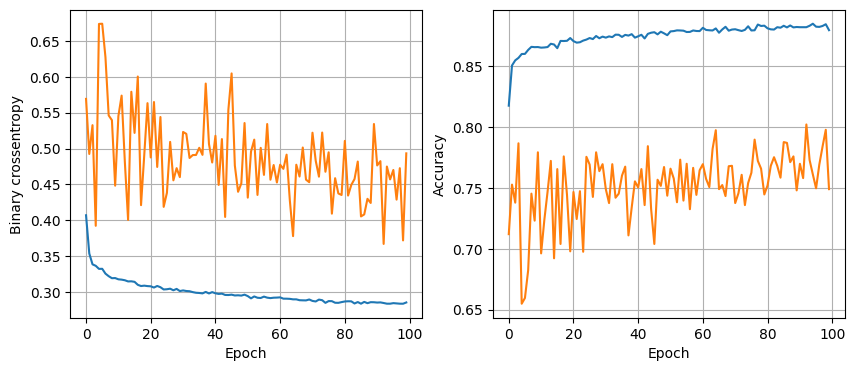

119/119 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.8623
16 nodes, dropout 0, lr 0.01, batch size 64


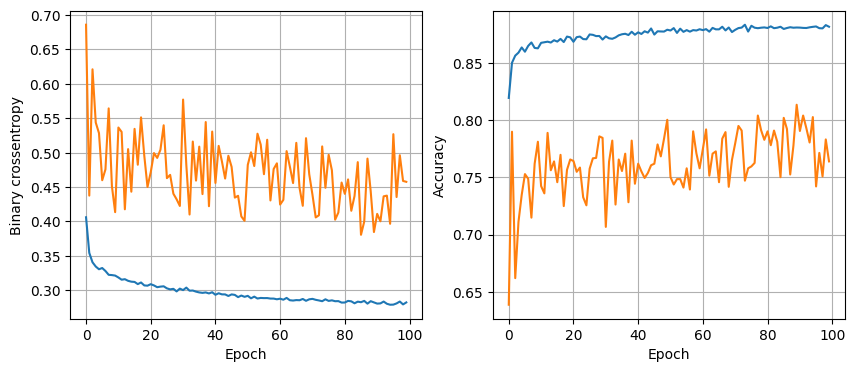

119/119 [==============================] - 0s 2ms/step - loss: 0.3449 - accuracy: 0.8659
16 nodes, dropout 0, lr 0.01, batch size 128


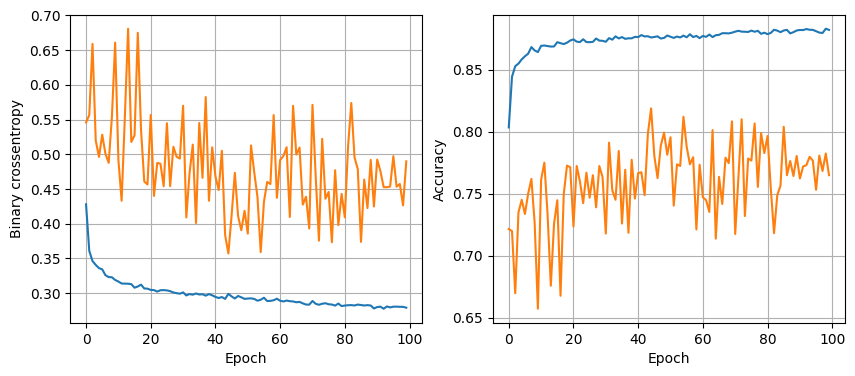

119/119 [==============================] - 1s 5ms/step - loss: 0.3365 - accuracy: 0.8636
16 nodes, dropout 0, lr 0.005, batch size 32


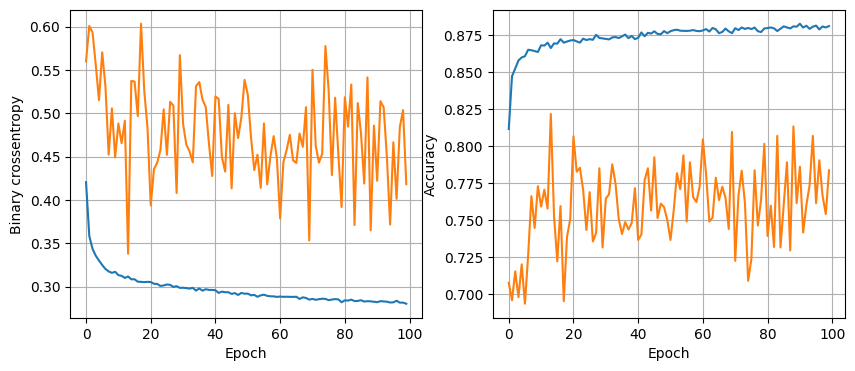

119/119 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.8699
16 nodes, dropout 0, lr 0.005, batch size 64


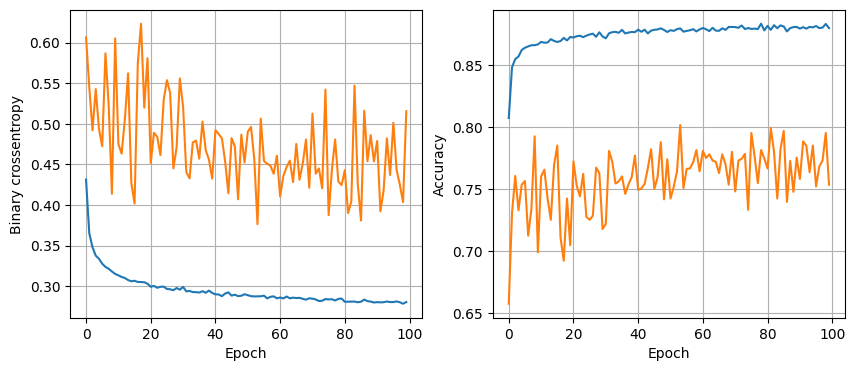

119/119 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8630
16 nodes, dropout 0, lr 0.005, batch size 128


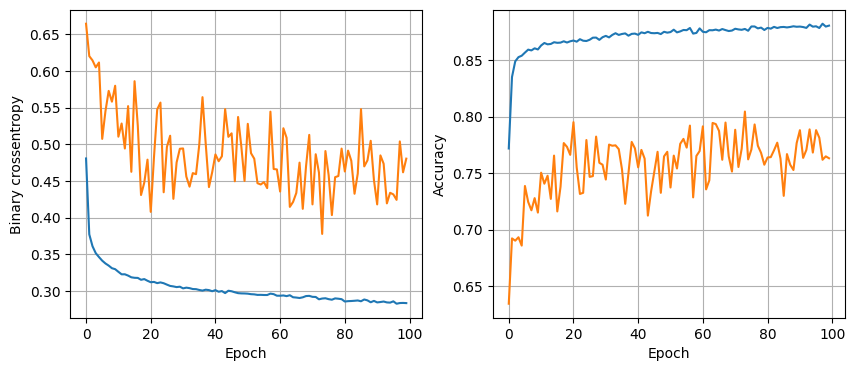

119/119 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8599
16 nodes, dropout 0, lr 0.001, batch size 32


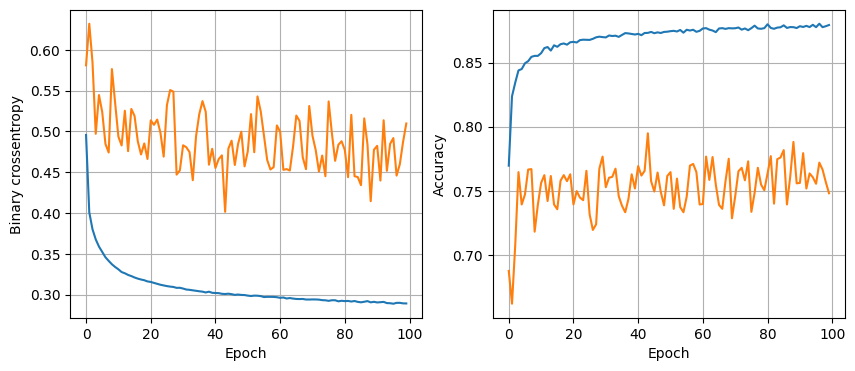

119/119 [==============================] - 0s 2ms/step - loss: 0.3207 - accuracy: 0.8615
16 nodes, dropout 0, lr 0.001, batch size 64


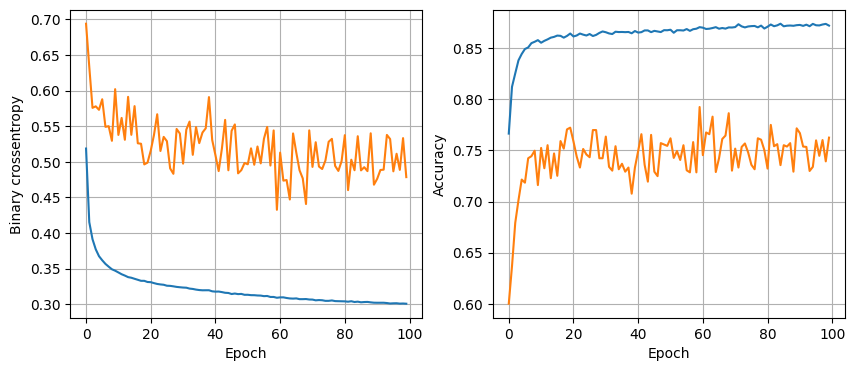

119/119 [==============================] - 0s 2ms/step - loss: 0.3238 - accuracy: 0.8625
16 nodes, dropout 0, lr 0.001, batch size 128


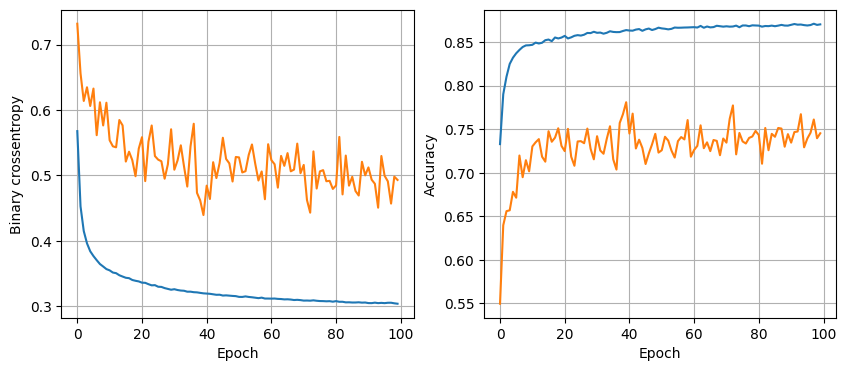

119/119 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.8625
16 nodes, dropout 0.2, lr 0.01, batch size 32


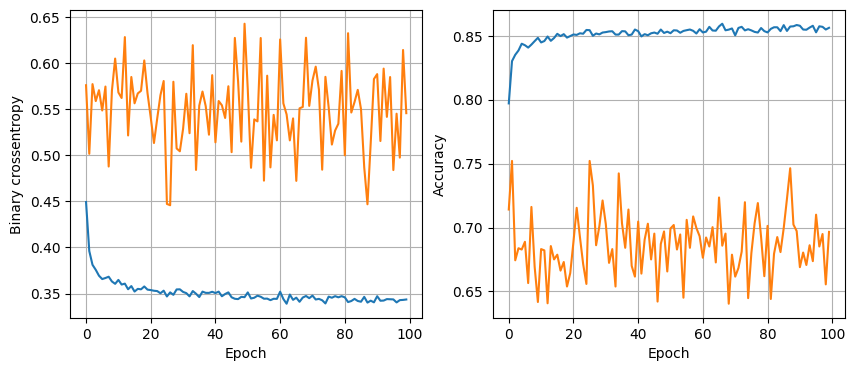

119/119 [==============================] - 0s 2ms/step - loss: 0.3294 - accuracy: 0.8591
16 nodes, dropout 0.2, lr 0.01, batch size 64


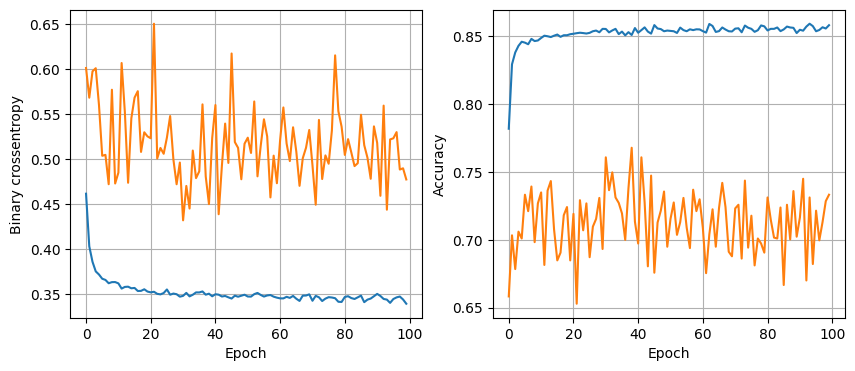

119/119 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8662
16 nodes, dropout 0.2, lr 0.01, batch size 128


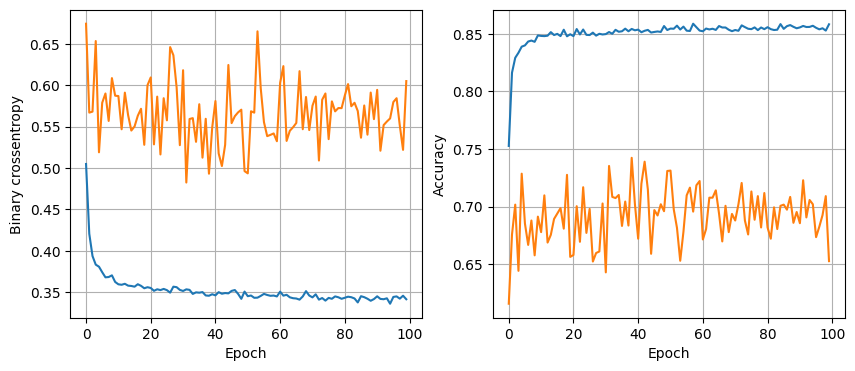

119/119 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8530
16 nodes, dropout 0.2, lr 0.005, batch size 32


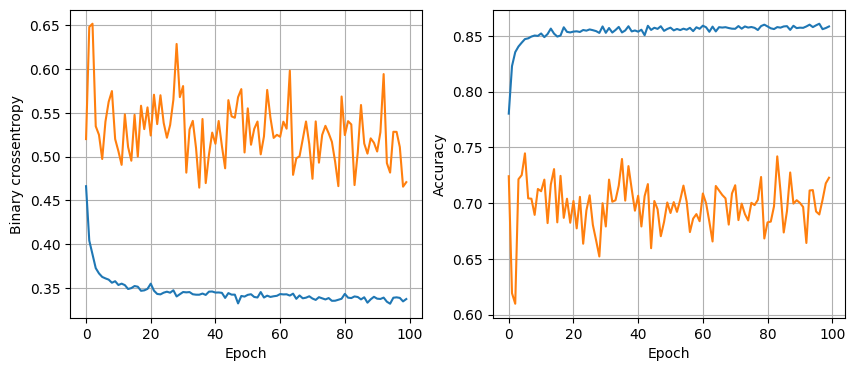

119/119 [==============================] - 0s 2ms/step - loss: 0.3277 - accuracy: 0.8612
16 nodes, dropout 0.2, lr 0.005, batch size 64


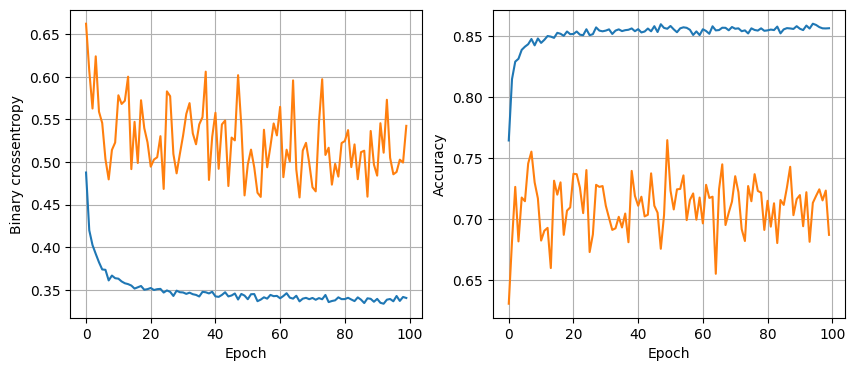

119/119 [==============================] - 0s 3ms/step - loss: 0.3294 - accuracy: 0.8583
16 nodes, dropout 0.2, lr 0.005, batch size 128


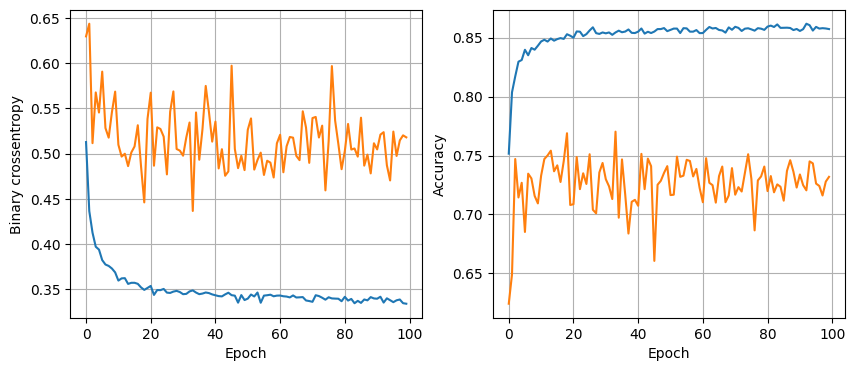

119/119 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.8615
16 nodes, dropout 0.2, lr 0.001, batch size 32


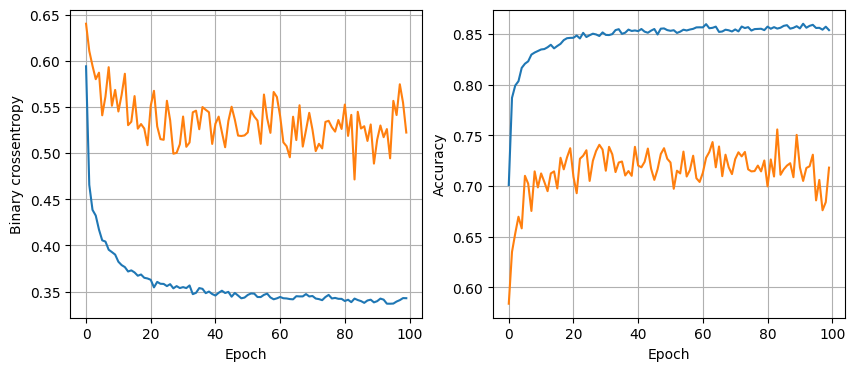

119/119 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8588
16 nodes, dropout 0.2, lr 0.001, batch size 64


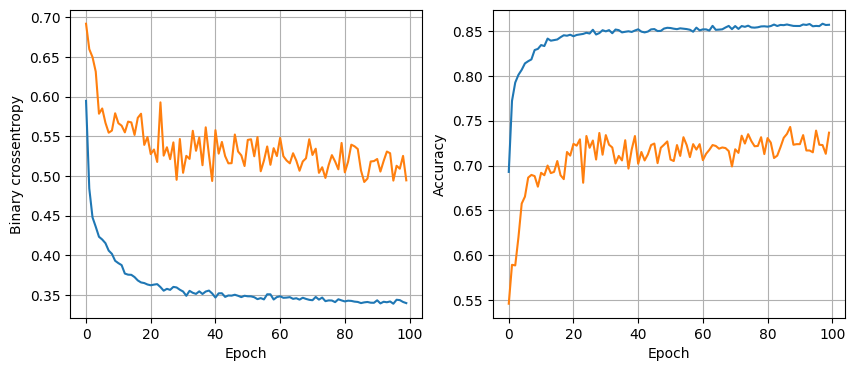

119/119 [==============================] - 0s 3ms/step - loss: 0.3274 - accuracy: 0.8601
16 nodes, dropout 0.2, lr 0.001, batch size 128


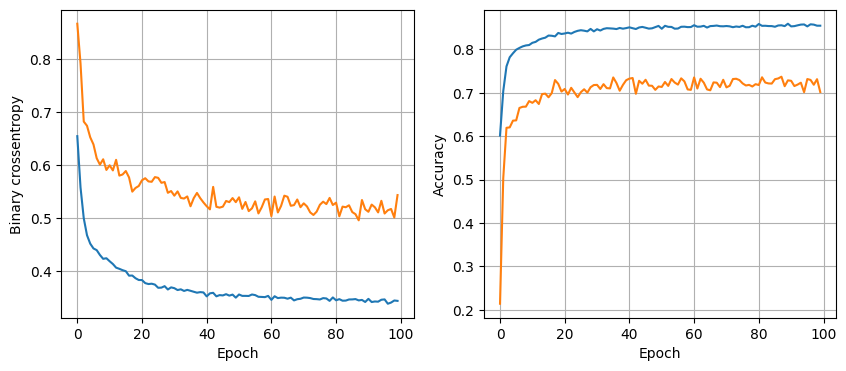

119/119 [==============================] - 0s 2ms/step - loss: 0.3290 - accuracy: 0.8599
32 nodes, dropout 0, lr 0.01, batch size 32


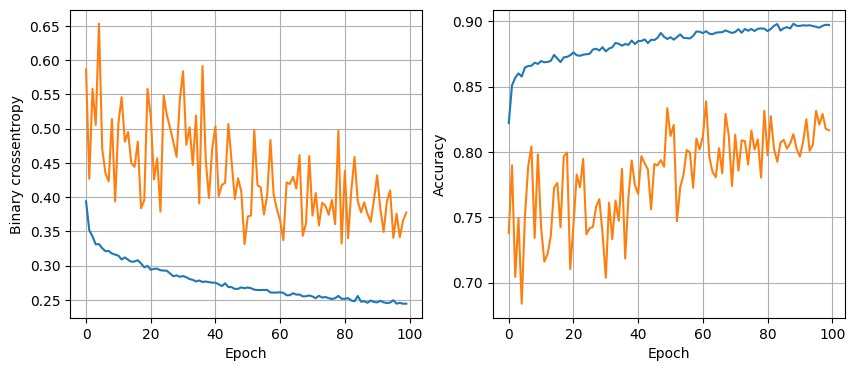

119/119 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8583
32 nodes, dropout 0, lr 0.01, batch size 64


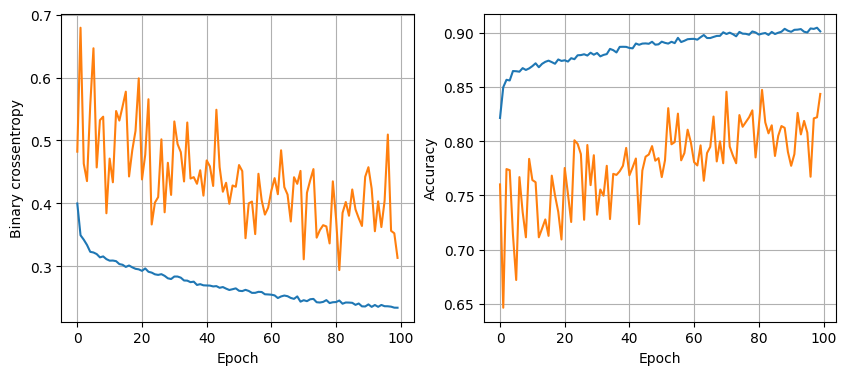

119/119 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8549
32 nodes, dropout 0, lr 0.01, batch size 128


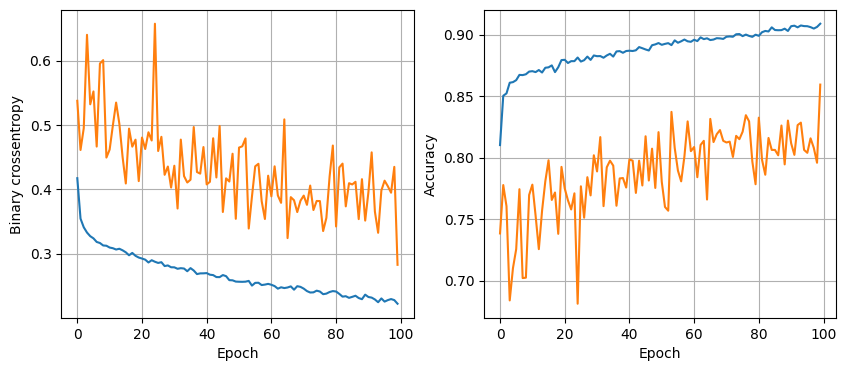

119/119 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8457
32 nodes, dropout 0, lr 0.005, batch size 32


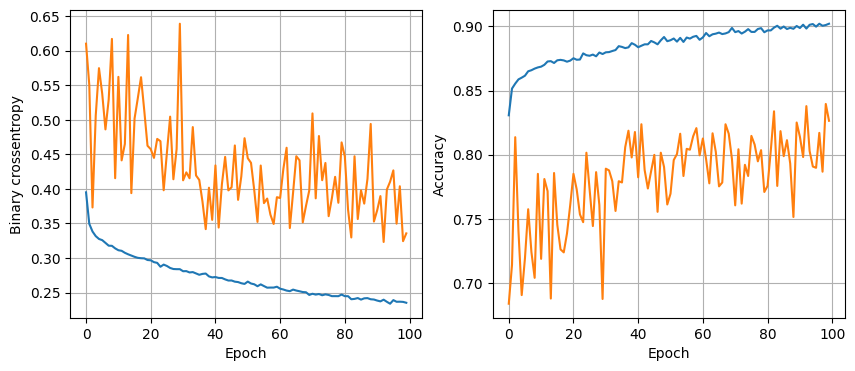

119/119 [==============================] - 0s 3ms/step - loss: 0.3779 - accuracy: 0.8573
32 nodes, dropout 0, lr 0.005, batch size 64


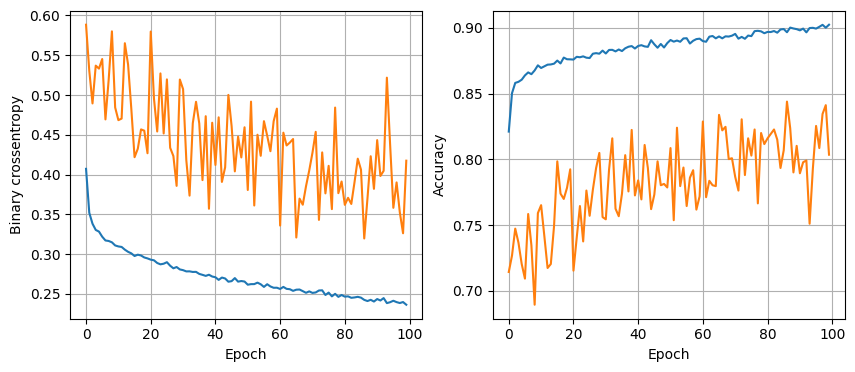

119/119 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8628
32 nodes, dropout 0, lr 0.005, batch size 128


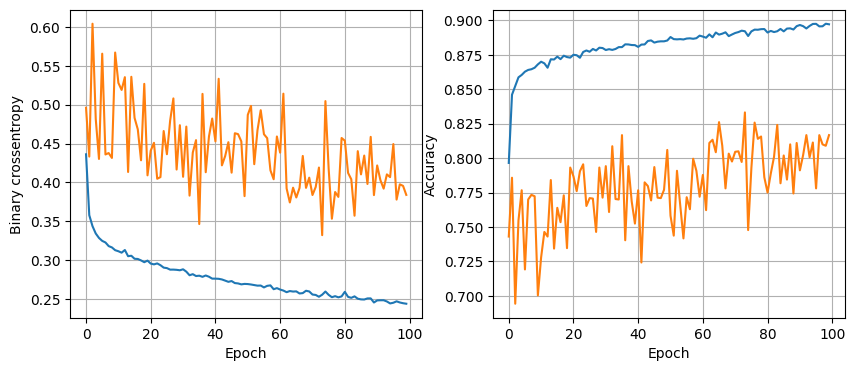

119/119 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8651
32 nodes, dropout 0, lr 0.001, batch size 32


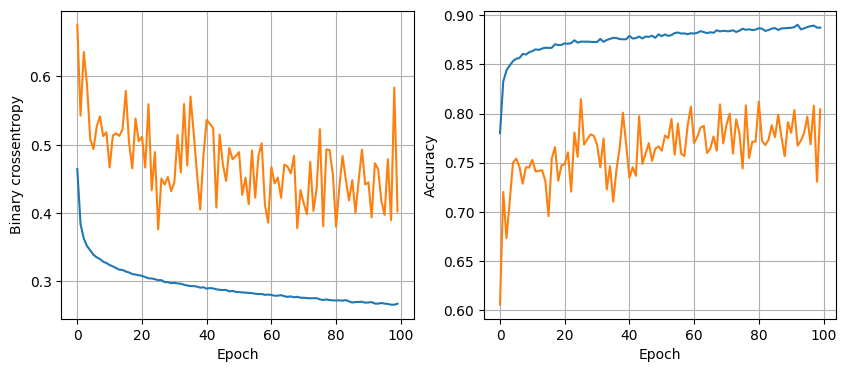

119/119 [==============================] - 0s 2ms/step - loss: 0.3207 - accuracy: 0.8717
32 nodes, dropout 0, lr 0.001, batch size 64


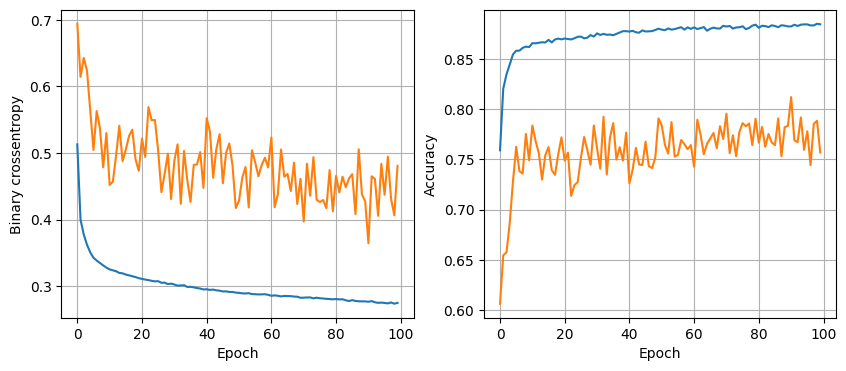

119/119 [==============================] - 0s 3ms/step - loss: 0.3240 - accuracy: 0.8662
32 nodes, dropout 0, lr 0.001, batch size 128


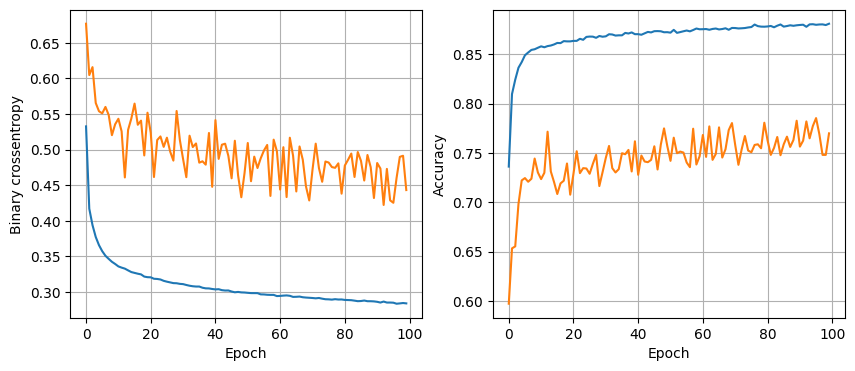

119/119 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.8720
32 nodes, dropout 0.2, lr 0.01, batch size 32


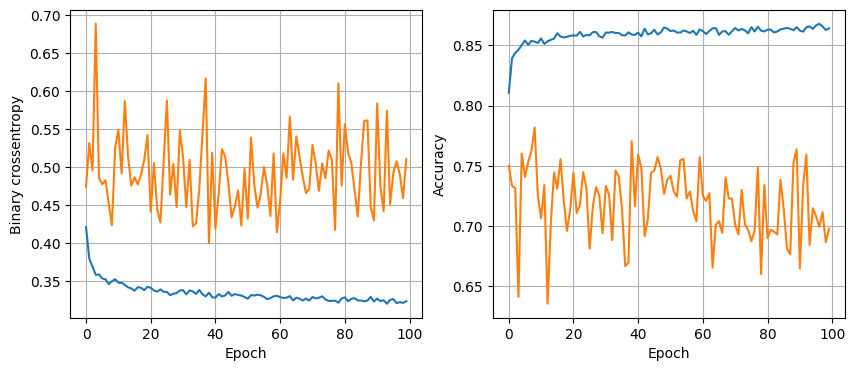

119/119 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8620
32 nodes, dropout 0.2, lr 0.01, batch size 64


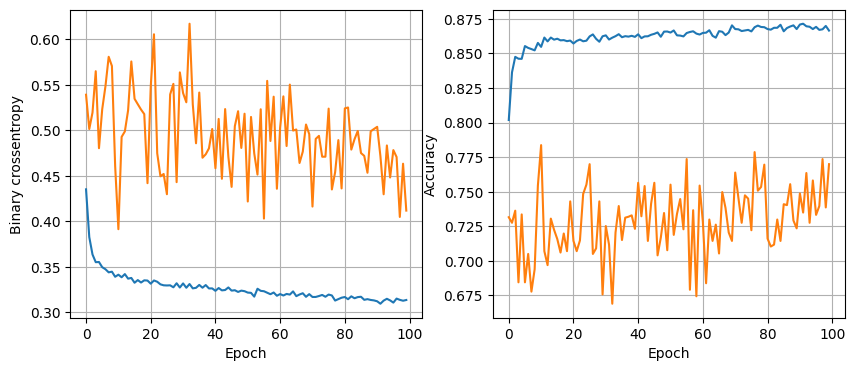

119/119 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8683
32 nodes, dropout 0.2, lr 0.01, batch size 128


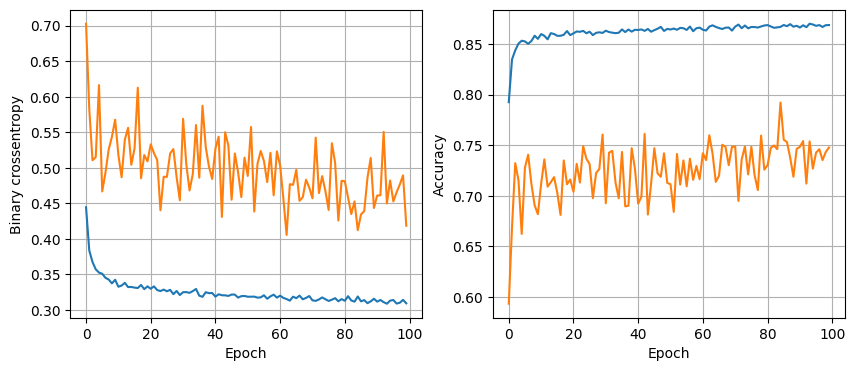

119/119 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8636
32 nodes, dropout 0.2, lr 0.005, batch size 32


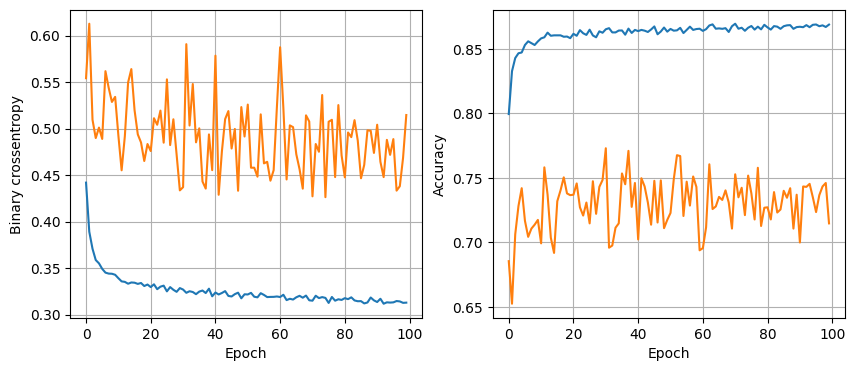

119/119 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8628
32 nodes, dropout 0.2, lr 0.005, batch size 64


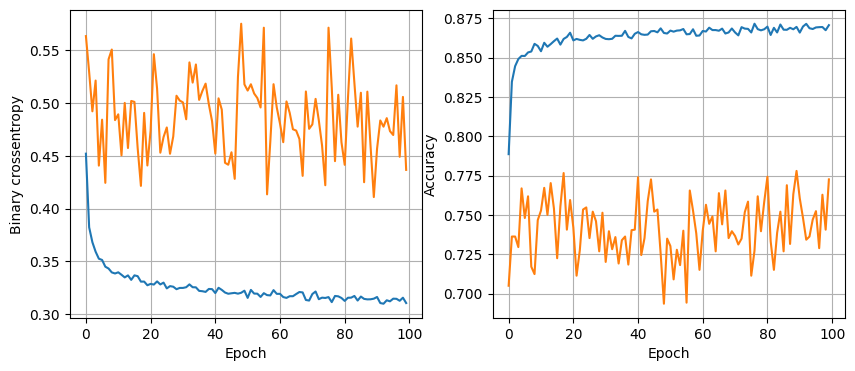

119/119 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.8722
32 nodes, dropout 0.2, lr 0.005, batch size 128


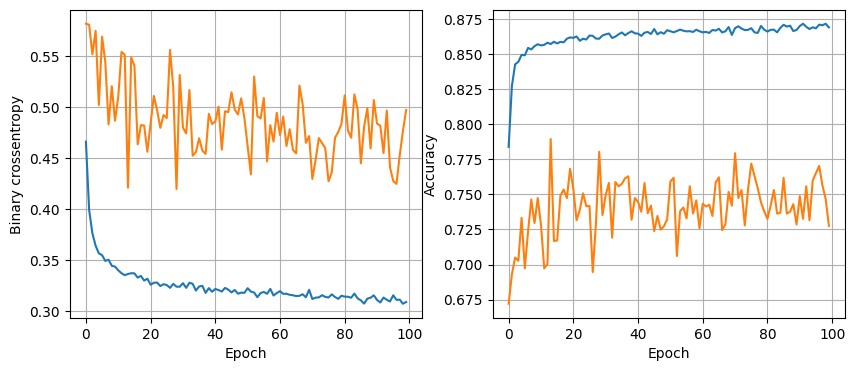

119/119 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.8628
32 nodes, dropout 0.2, lr 0.001, batch size 32


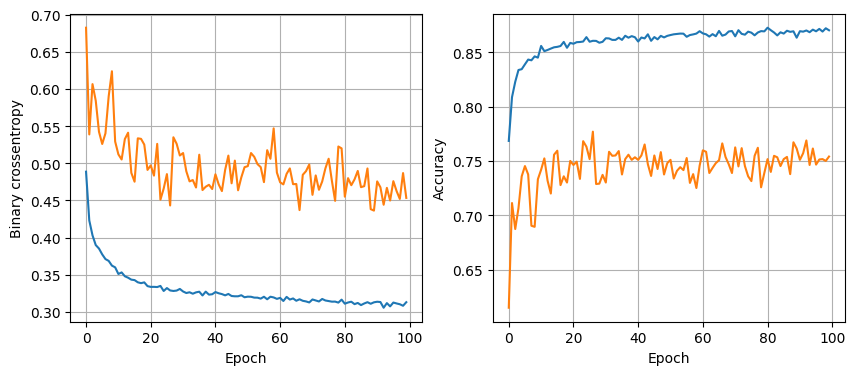

119/119 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8672
32 nodes, dropout 0.2, lr 0.001, batch size 64


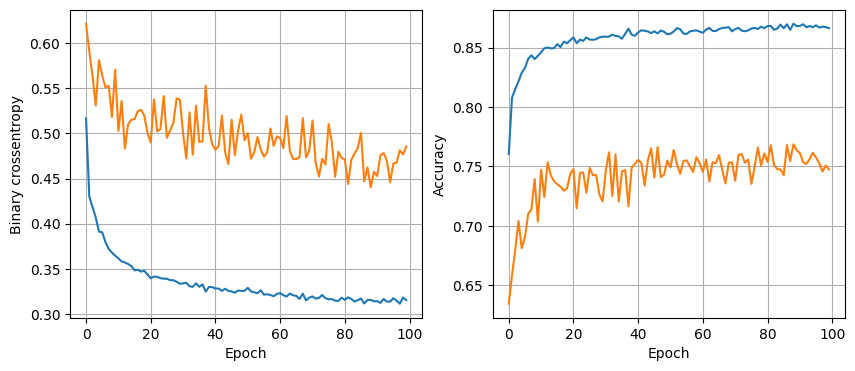

119/119 [==============================] - 0s 3ms/step - loss: 0.3111 - accuracy: 0.8659
32 nodes, dropout 0.2, lr 0.001, batch size 128


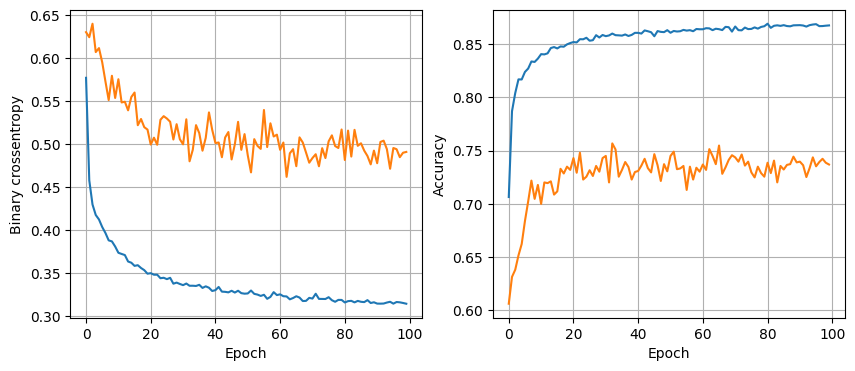

119/119 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8680
64 nodes, dropout 0, lr 0.01, batch size 32


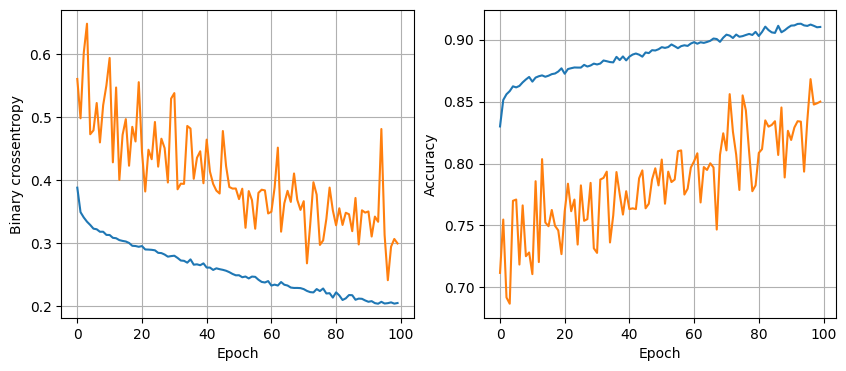

119/119 [==============================] - 0s 3ms/step - loss: 0.4901 - accuracy: 0.8523
64 nodes, dropout 0, lr 0.01, batch size 64


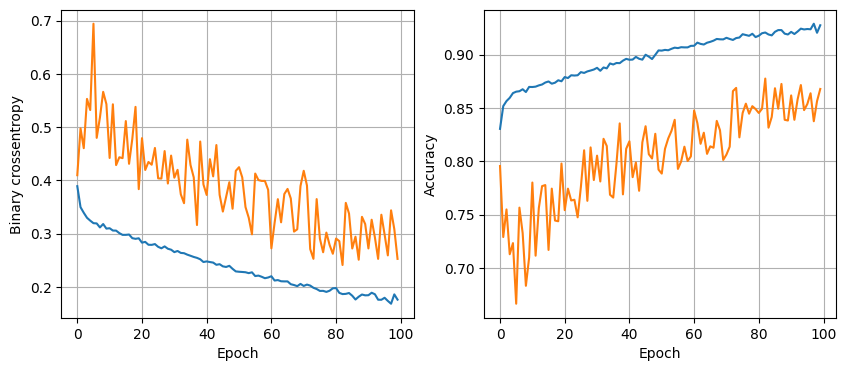

119/119 [==============================] - 0s 2ms/step - loss: 0.4991 - accuracy: 0.8504
64 nodes, dropout 0, lr 0.01, batch size 128


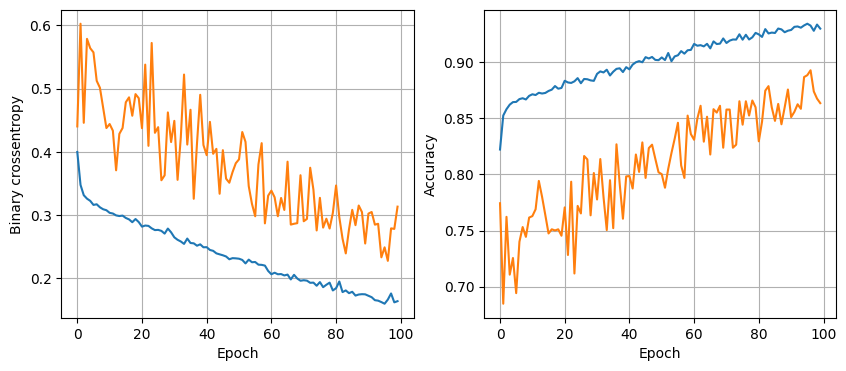

119/119 [==============================] - 0s 3ms/step - loss: 0.5619 - accuracy: 0.8502
64 nodes, dropout 0, lr 0.005, batch size 32


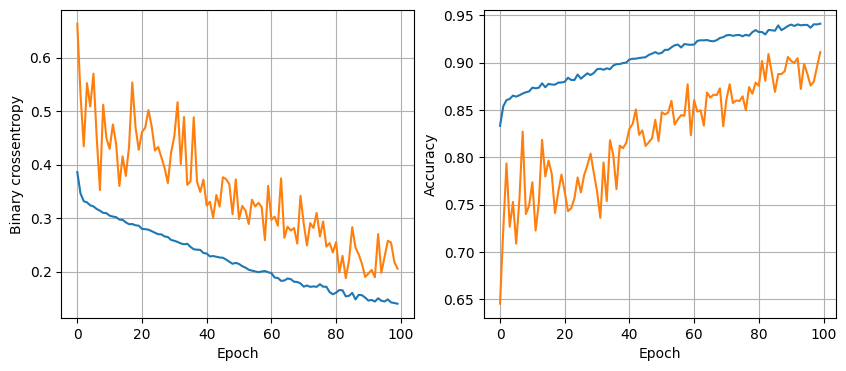

119/119 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.8420
64 nodes, dropout 0, lr 0.005, batch size 64


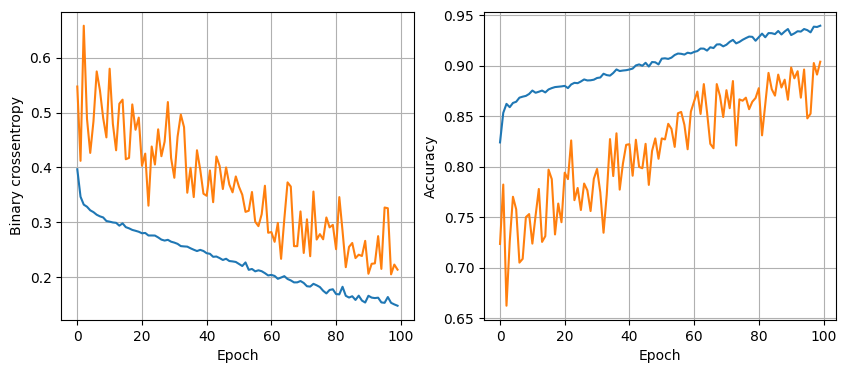

119/119 [==============================] - 0s 2ms/step - loss: 0.5814 - accuracy: 0.8467
64 nodes, dropout 0, lr 0.005, batch size 128


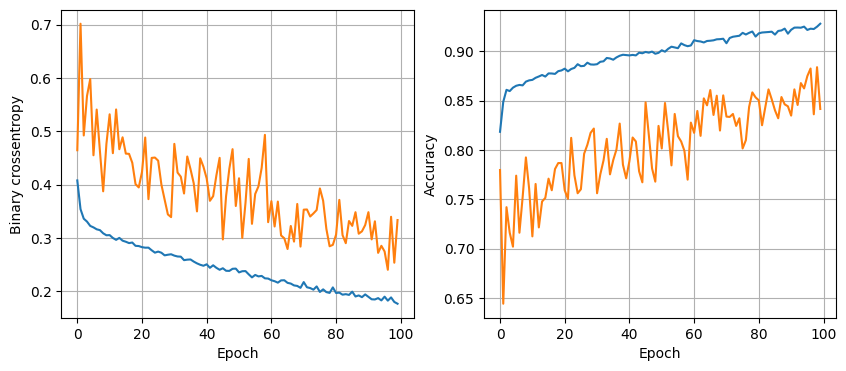

119/119 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.8520
64 nodes, dropout 0, lr 0.001, batch size 32


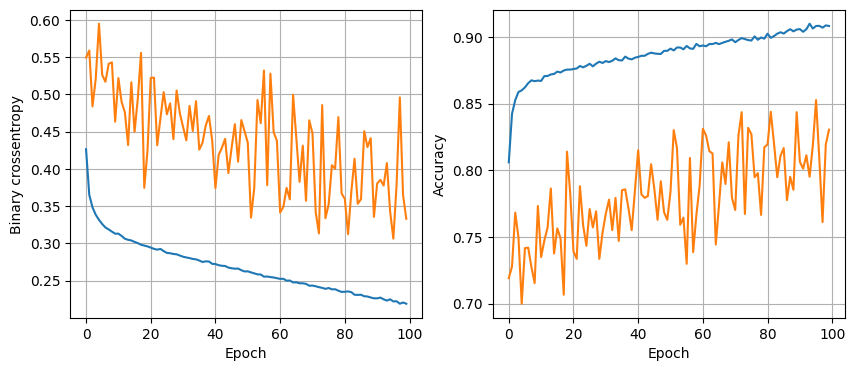

119/119 [==============================] - 0s 2ms/step - loss: 0.3512 - accuracy: 0.8725
64 nodes, dropout 0, lr 0.001, batch size 64


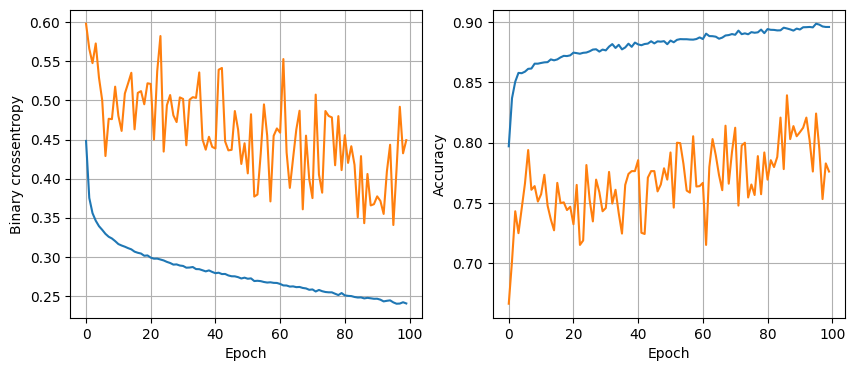

119/119 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8712
64 nodes, dropout 0, lr 0.001, batch size 128


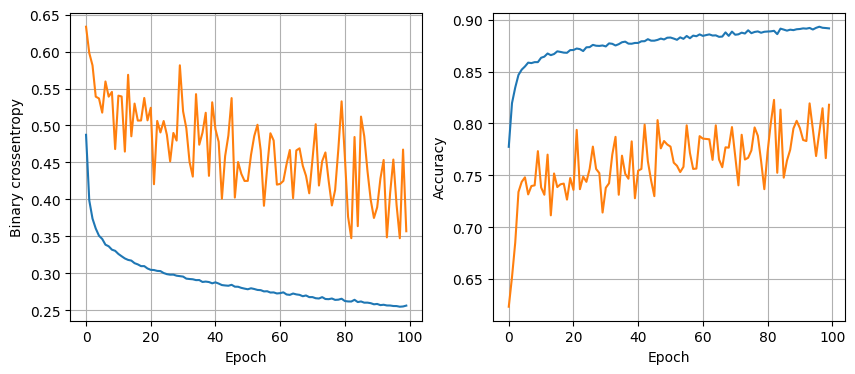

119/119 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.8680
64 nodes, dropout 0.2, lr 0.01, batch size 32


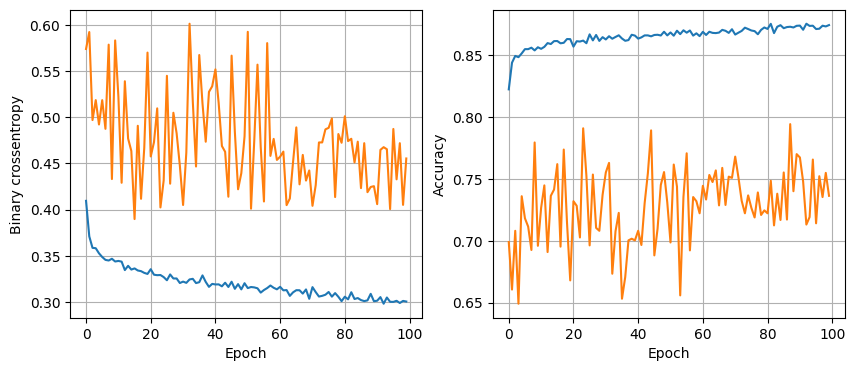

119/119 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.8641
64 nodes, dropout 0.2, lr 0.01, batch size 64


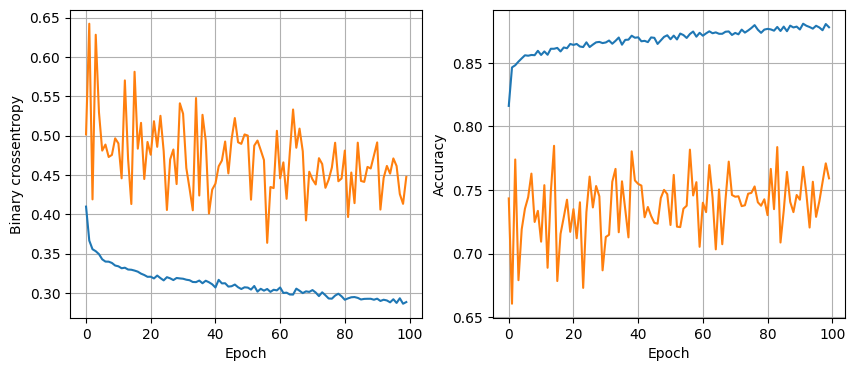

119/119 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8659
64 nodes, dropout 0.2, lr 0.01, batch size 128


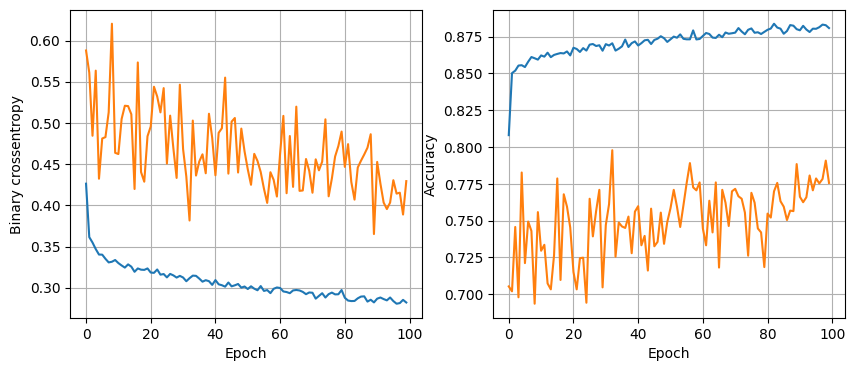

119/119 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.8696
64 nodes, dropout 0.2, lr 0.005, batch size 32


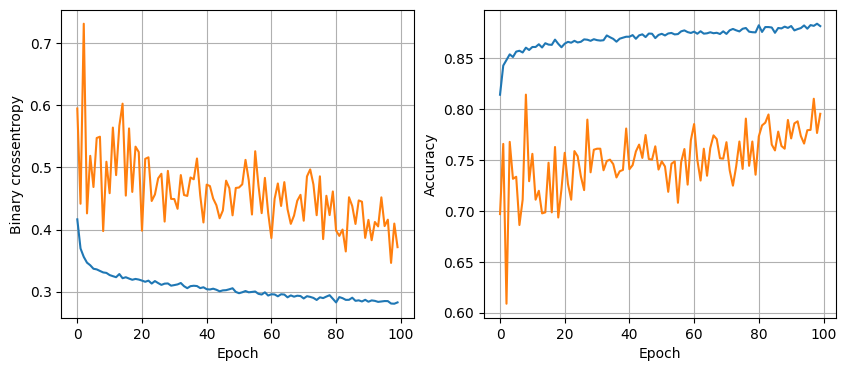

119/119 [==============================] - 0s 2ms/step - loss: 0.3209 - accuracy: 0.8725
64 nodes, dropout 0.2, lr 0.005, batch size 64


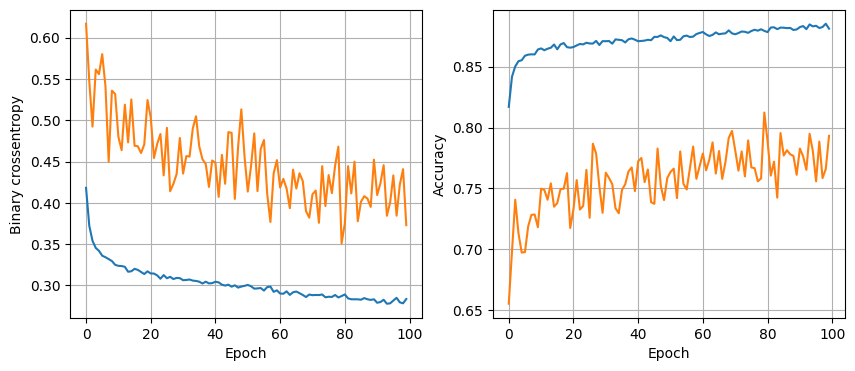

119/119 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8743
64 nodes, dropout 0.2, lr 0.005, batch size 128


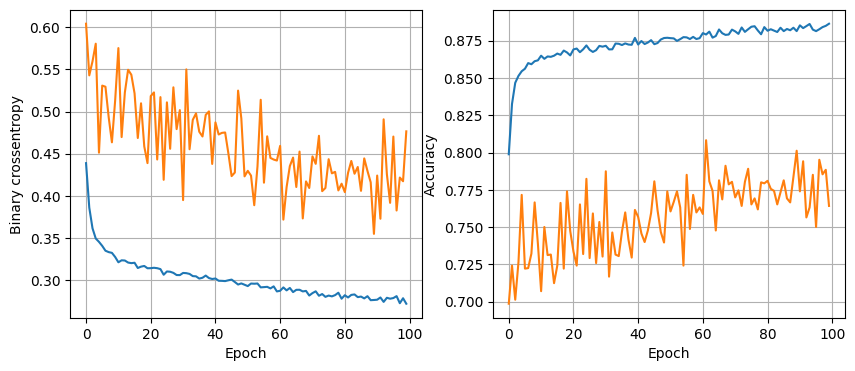

119/119 [==============================] - 0s 3ms/step - loss: 0.3116 - accuracy: 0.8693
64 nodes, dropout 0.2, lr 0.001, batch size 32


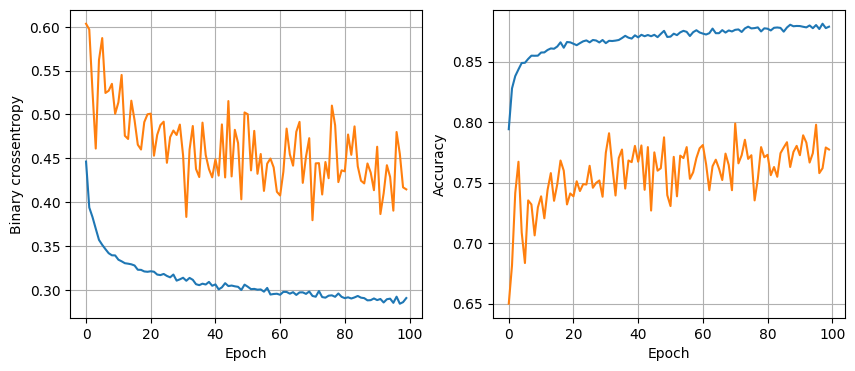

119/119 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.8712
64 nodes, dropout 0.2, lr 0.001, batch size 64


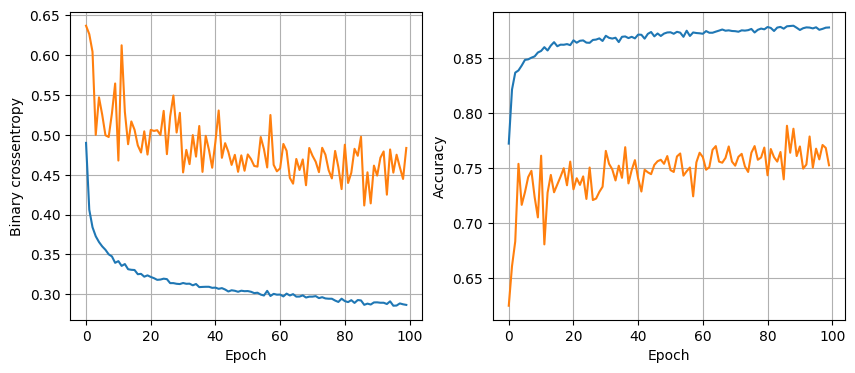

119/119 [==============================] - 0s 2ms/step - loss: 0.3106 - accuracy: 0.8696
64 nodes, dropout 0.2, lr 0.001, batch size 128


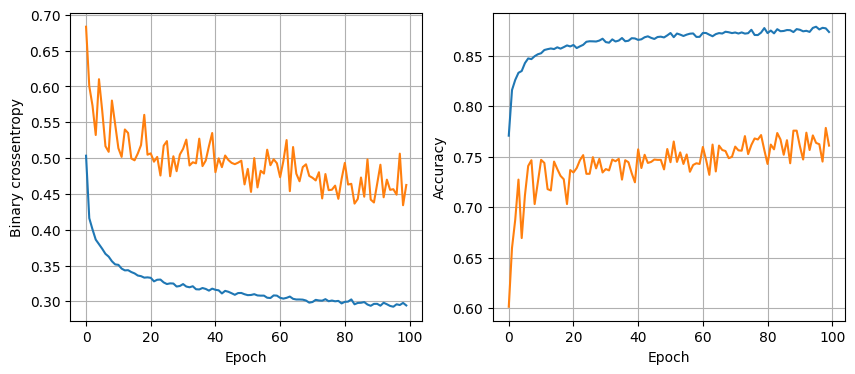

119/119 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8686


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout{dropout_prob}, lr{lr}, batch size{batch_size}")
        model, history = train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, Y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
Y_pred = least_loss_model.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(int).reshape(-1,)

In [ ]:
print(classification_report(Y_test, Y_pred))